# 📊 Notebook 1 – Préparation des données

Ce notebook contient toutes les étapes de préparation des données pour notre projet d'analyse des exportations de poulet.

Étapes :
1. Chargement des données (FAO, population, fintech)
2. Nettoyage et fusion
3. Filtrage des données sur la volaille
4. Construction de la table par pays
5. Standardisation
6. Sauvegarde des résultats pour l'analyse


In [2]:
# --- Cellule 1 : Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# Fonctions du projet
from script import (
    charger_donnees,
    nettoyer_et_fusionner,
    filtrer_poulet,
    construire_table_pays,
    standardiser_donnees
)

# Réglages d'affichage
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")



In [3]:
# --- Cellule 2 : Chargement des données
dispo, population, df_fintech = charger_donnees()
print(f"✔️ Données chargées : {len(dispo)} lignes pour disponibiliteAlimentaire, {len(population)} pour population")




✔️ Données chargées : 176600 lignes pour disponibiliteAlimentaire, 4411 pour population


In [4]:
# --- Cellule 3 : Nettoyage et fusion
df_data = nettoyer_et_fusionner(dispo, population)
print(f"✔️ Fusion terminée : {df_data.shape}")




✔️ Fusion terminée : (176600, 26)


In [5]:
# --- Cellule 4 : Filtrage sur le poulet / volaille
df_poulet = filtrer_poulet(df_data)
print(f"✔️ Données filtrées (poulet/volaille) : {df_poulet['Zone_x'].nunique()} pays concernés")



✔️ Données filtrées (poulet/volaille) : 172 pays concernés


In [6]:
# --- Cellule 5 : Construction de la table des pays
table_pays = construire_table_pays(df_poulet)
print(f"✔️ Table des pays construite : {table_pays.shape[0]} pays, {table_pays.shape[1]} colonnes")


✔️ Table des pays construite : 172 pays, 18 colonnes


In [8]:
# --- Cellule 6 : Standardisation des données
X, X_scaled = standardiser_donnees(table_pays)
print(f"✔️ Données standardisées : {X.shape[1]} variables")



✔️ Données standardisées : 16 variables


In [9]:
# --- Cellule 7 : Sauvegarde intermédiaire
table_pays.to_csv("table_pays.csv", index=False)
pd.DataFrame(X_scaled, columns=X.columns).to_csv("X_scaled.csv", index=False)
print("💾 Fichiers table_pays.csv et X_scaled.csv sauvegardés")



💾 Fichiers table_pays.csv et X_scaled.csv sauvegardés


In [10]:
# --- Cellule 8 : Statistiques descriptives
table_pays.describe().round(2)


Élément_x,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
count,78.00,172.0,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.0,172.00,172.00
mean,0.22,0.0,44.12,74.56,20.21,4.90,7.12,687.59,103.75,88.49,657.05,43.58,725.19,-2.84,0.0,26.28,13.67
std,2.40,0.0,62.57,60.57,15.86,4.19,5.60,2174.36,458.07,185.82,2124.01,75.06,2472.03,13.26,0.0,28.23,74.70
min,-18.00,0.0,0.00,0.00,0.13,0.03,0.04,2.00,0.00,0.00,2.00,0.00,0.00,-125.00,0.0,0.00,-119.00
25%,0.00,0.0,44.12,22.00,6.44,1.46,2.16,31.50,0.00,3.00,29.50,11.50,14.75,0.00,0.0,26.28,0.00
50%,0.00,0.0,44.12,64.00,18.09,3.74,6.50,105.00,0.00,16.00,101.00,43.58,74.50,0.00,0.0,26.28,0.00
75%,0.00,0.0,44.12,105.50,30.04,6.60,10.36,376.50,12.00,79.75,383.50,43.58,503.00,0.00,0.0,26.28,8.00
max,5.00,0.0,783.00,243.00,72.31,17.86,27.87,18266.00,4223.00,1069.00,18100.00,695.00,21914.00,0.00,0.0,306.00,859.00


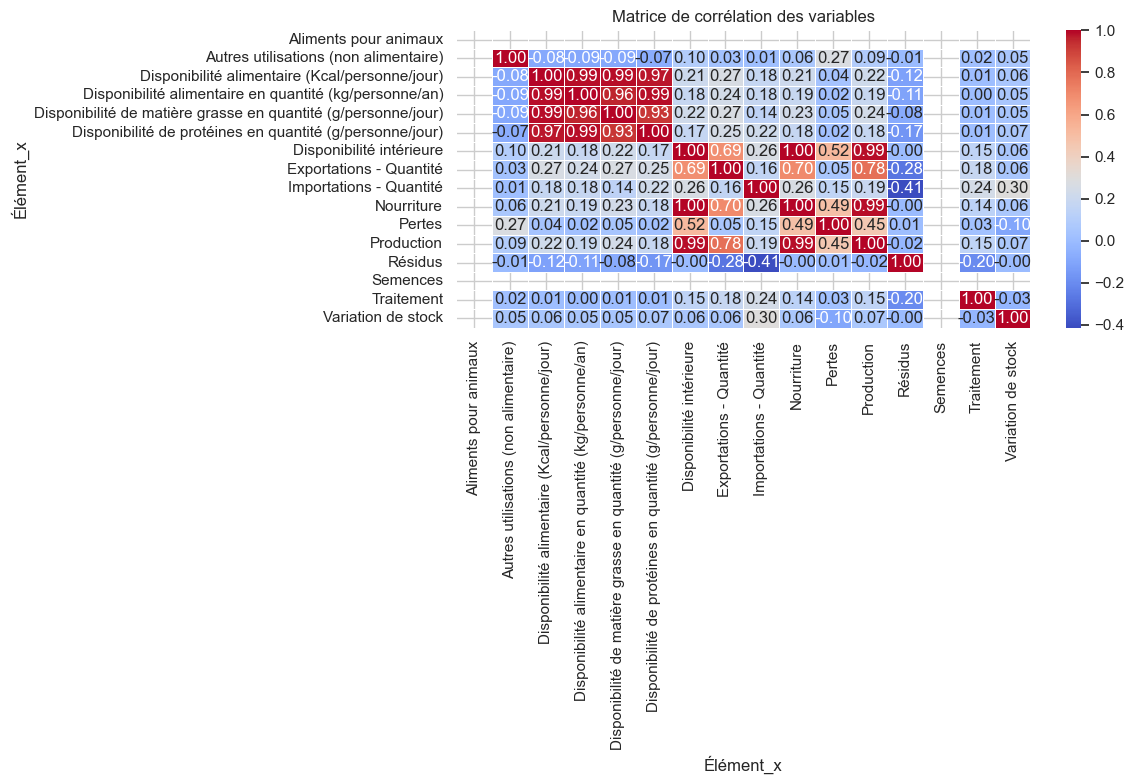

In [11]:
# --- Cellule 9 : Heatmap de corrélation
plt.figure(figsize=(12, 8))
corr = X.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation des variables")
plt.tight_layout()
plt.show()


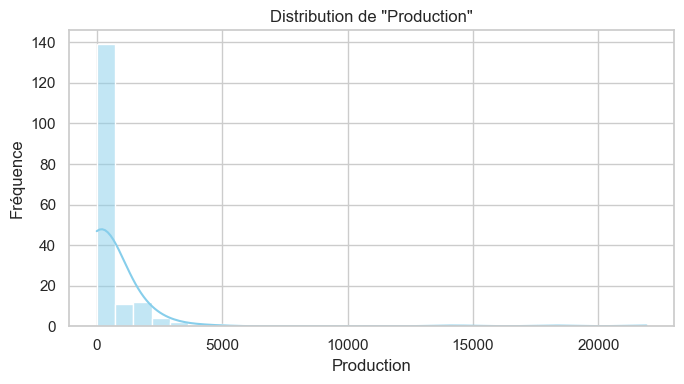

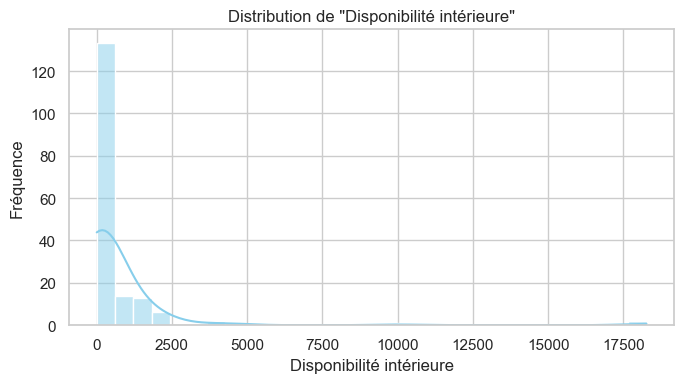

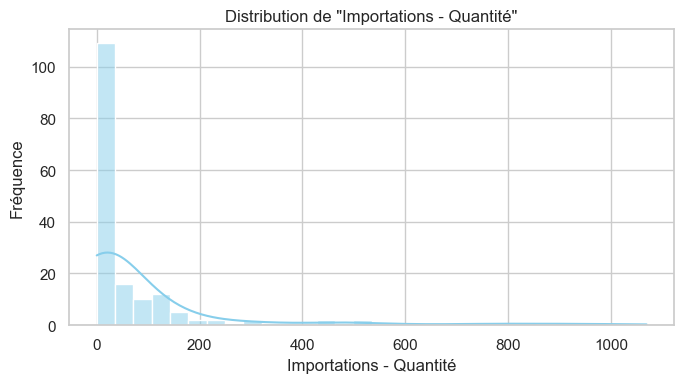

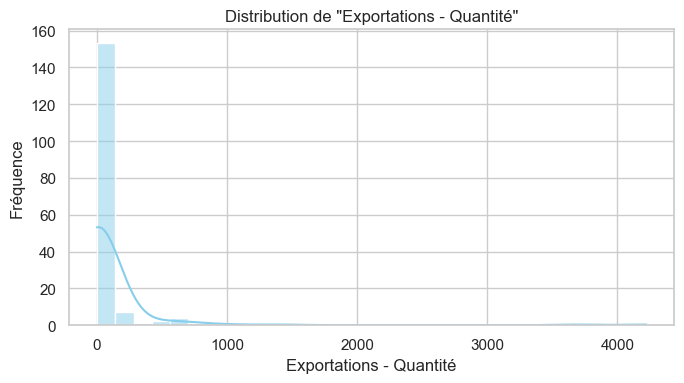

In [12]:
# --- Cellule 10 : Distributions des principales variables
colonnes_principales = ['Production', 'Disponibilité intérieure', 'Importations - Quantité', 'Exportations - Quantité']
for col in colonnes_principales:
    if col in table_pays.columns:
        plt.figure(figsize=(7, 4))
        sns.histplot(table_pays[col], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution de "{col}"')
        plt.xlabel(col)
        plt.ylabel("Fréquence")
        plt.tight_layout()
        plt.show()


📍 Top 10 pays importateurs de volaille :


Élément_x,Zone_x,Importations - Quantité
75,Japon,1069.0
98,Mexique,972.0
31,Chine - RAS de Hong-Kong,907.0
4,Allemagne,842.0
124,Royaume-Uni de Grande-Bretagne et d'Irlande du...,779.0
7,Arabie saoudite,722.0
117,Pays-Bas,608.0
1,Afrique du Sud,514.0
51,France,506.0
69,Iraq,470.0


C:\Users\AUCLAIR\AppData\Local\Temp\ipykernel_10864\3294400057.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_imports, x='Importations - Quantité', y='Zone_x', palette='viridis')


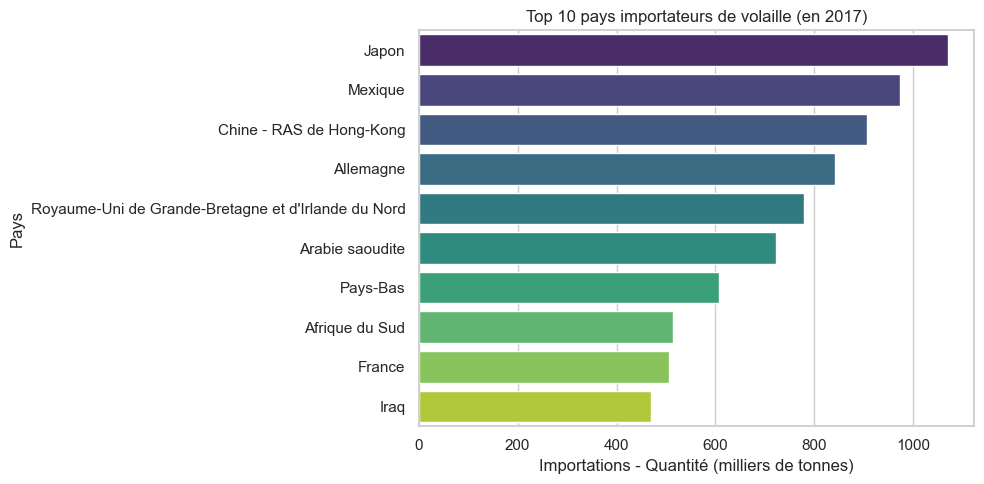

In [13]:
# --- Cellule 11 : Top 10 importateurs
if 'Importations - Quantité' in table_pays.columns:
    top10_imports = table_pays[['Zone_x', 'Importations - Quantité']].sort_values(by='Importations - Quantité', ascending=False).head(10)
    print("📍 Top 10 pays importateurs de volaille :")
    display(top10_imports)

    plt.figure(figsize=(10, 5))
    sns.barplot(data=top10_imports, x='Importations - Quantité', y='Zone_x', palette='viridis')
    plt.title("Top 10 pays importateurs de volaille (en 2017)")
    plt.xlabel("Importations - Quantité (milliers de tonnes)")
    plt.ylabel("Pays")
    plt.tight_layout()
    plt.show()
